Prediction using Supervised ML
(Level - Beginner)

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day? 

Importing the required libraries. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the data from given URL.

In [ ]:
a=pd.read_csv("http://bit.ly/w-data")

**Analyzing the data.**

In [ ]:
a.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
a.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [13]:
a.shape

(25, 2)

In [11]:
a.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are no null values.
Now Plotting the data.

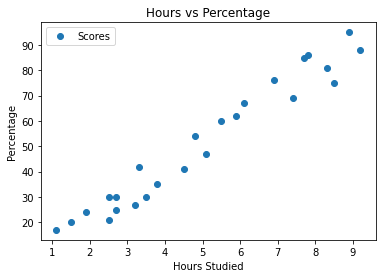

In [19]:
a.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage')  
plt.show()

Preparing of data.

In [21]:
X = a.iloc[:, :-1].values  
y = a.iloc[:, 1].values  

Importing method train_test_split from Scikit-Learn and splitting the data into training and testing sets.

In [22]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

Training 

In [25]:
from sklearn.linear_model import LinearRegression  

In [26]:
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(reg.intercept_)

2.018160041434662


In [30]:
print(reg.coef_)

[9.91065648]


Plotting Regression Line

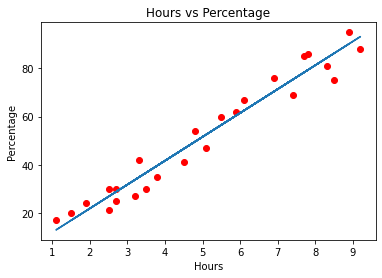

In [36]:
line = reg.coef_*X+reg.intercept_
plt.scatter(X, y,color='red')
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')
plt.show()

Predicition

In [33]:
print(X_test) 
y_pred = reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing Actual and Predicted values.

In [37]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Predicting the Score for a student studying 9.25 hrs in a day.

In [43]:
pred = reg.predict([[9.25]])
print("Predicted Score = ",pred)

Predicted Score =  [93.69173249]


Evaluating the Model.

In [44]:
from sklearn import metrics
print("Mean Absolute Error (MAE) =",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Sqaured Error (MSE) =",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) =",np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error (MAE) = 4.183859899002982
Mean Sqaured Error (MSE) = 21.598769307217456
Root Mean Squared Error (RMSE) = 2.0454485813637513
